In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

import os
import random
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

#**GPU configaration**
If memory growth is enabled for a PhysicalDevice, the runtime initialization will not allocate all memory on the device.

In [2]:
gpu_device = tf.config.experimental.list_physical_devices('GPU')
print(f"Number of GPU = {len(gpu_device)}")
tf.config.experimental.set_memory_growth(gpu_device[0], True)

Number of GPU = 1


#**Load dataset**

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)

Shape of x_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


#**Display images**

Image (#9): Which is digit 'cat'


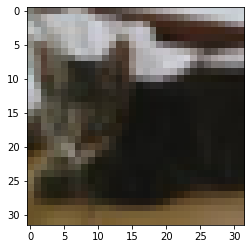

In [4]:
img_name = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
digit = 9 # Change to choose new digit
a = x_train[digit]
plt.imshow(a)
print(f"Image (#{digit}): Which is digit '{img_name[(y_train[digit][0])]}'")

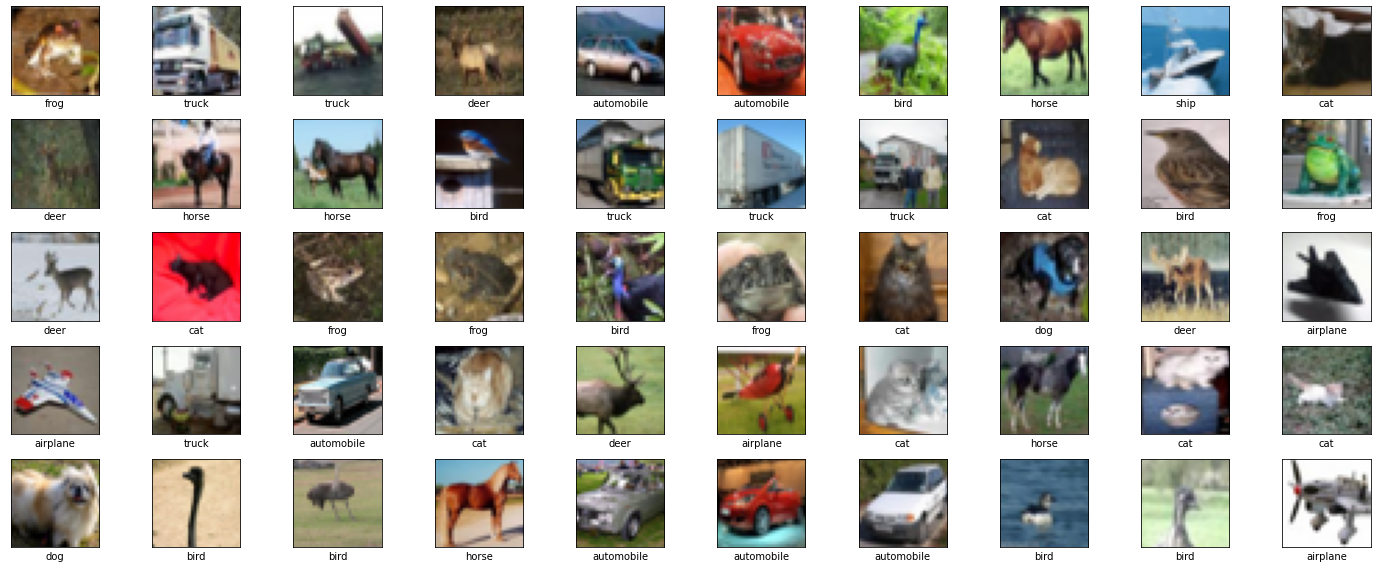

In [5]:
ROWS = 5
COLS = 10
i = 0

plt.figure(figsize=(20,8))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(img_name[y_train[i][0]])
        i += 1
plt.tight_layout()
plt.show()

In [6]:
x_train, x_test = x_train / 255.0, x_test / 255.0

Image (#9): Which is digit 'cat'


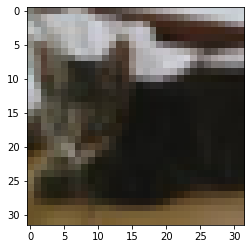

In [7]:
digit = 9 # Change to choose new digit
a = x_train[digit].reshape(32,32,3)
plt.imshow(a)
print(f"Image (#{digit}): Which is digit '{img_name[(y_train[digit][0])]}'")

#Build the model

In [32]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(32,32,3)),
    
    ## hidden layers
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu'),
    layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    
    ## output layer
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 13, 13, 256)       295168    
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 4, 4, 512)         1180160   
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 2, 2, 256)         1179904   
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 1, 1, 256)        

#**Compile the model**
Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:


*   **Loss function** — This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
*   **Optimizer** — This is how the model is updated based on the data it sees and its loss function.
*   **Metrics** — Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.





In [33]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

#**Train the model**
* **one epoch** = one forward pass and one backward pass of all the training examples
* **batch size** = the number of training examples in one forward/backward pass. The higher the batch size, the more memory space you'll need.
> * **number of iterations** = number of passes, each pass using [ batch size ] number of examples. To be clear, one pass = one forward pass + one backward pass (we do not count the forward pass and backward pass as two different passes).
* **validation_split** last $x$% of your traning data is used as a validation dataset.
Example: if you have 1000 training examples, and your batch size is 500, then it will take 2 iterations to complete 1 epoch.



In [34]:
h = model.fit(x=x_train, y=y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
313/313 [==============================] - 14s 41ms/step - loss: 1.6618 - accuracy: 0.3804 - val_loss: 1.3367 - val_accuracy: 0.5157
Epoch 2/10
313/313 [==============================] - 13s 40ms/step - loss: 1.2233 - accuracy: 0.5638 - val_loss: 1.1263 - val_accuracy: 0.6002
Epoch 3/10
313/313 [==============================] - 13s 40ms/step - loss: 1.0254 - accuracy: 0.6374 - val_loss: 0.9908 - val_accuracy: 0.6505
Epoch 4/10
313/313 [==============================] - 13s 41ms/step - loss: 0.8831 - accuracy: 0.6892 - val_loss: 0.9271 - val_accuracy: 0.6838
Epoch 5/10
313/313 [==============================] - 13s 41ms/step - loss: 0.7798 - accuracy: 0.7262 - val_loss: 0.8432 - val_accuracy: 0.7113
Epoch 6/10
313/313 [==============================] - 13s 41ms/step - loss: 0.6782 - accuracy: 0.7643 - val_loss: 0.8221 - val_accuracy: 0.7181
Epoch 7/10
313/313 [==============================] - 13s 41ms/step - loss: 0.5841 - accuracy: 0.7986 - val_loss: 0.7890 - val_accuracy:

#Plot the training results

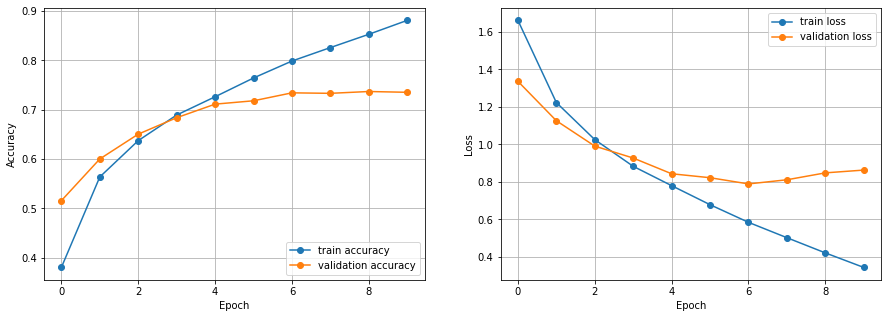

In [35]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

#Evaluate the model on the test dataset

In [36]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 2s 8ms/step - loss: 0.8972 - accuracy: 0.7265

Test accuracy: 0.7264999747276306

Test Loss: 0.897153913974762


#**Make predictions on the entire test images**

In [37]:
predictions = model.predict(x_test)

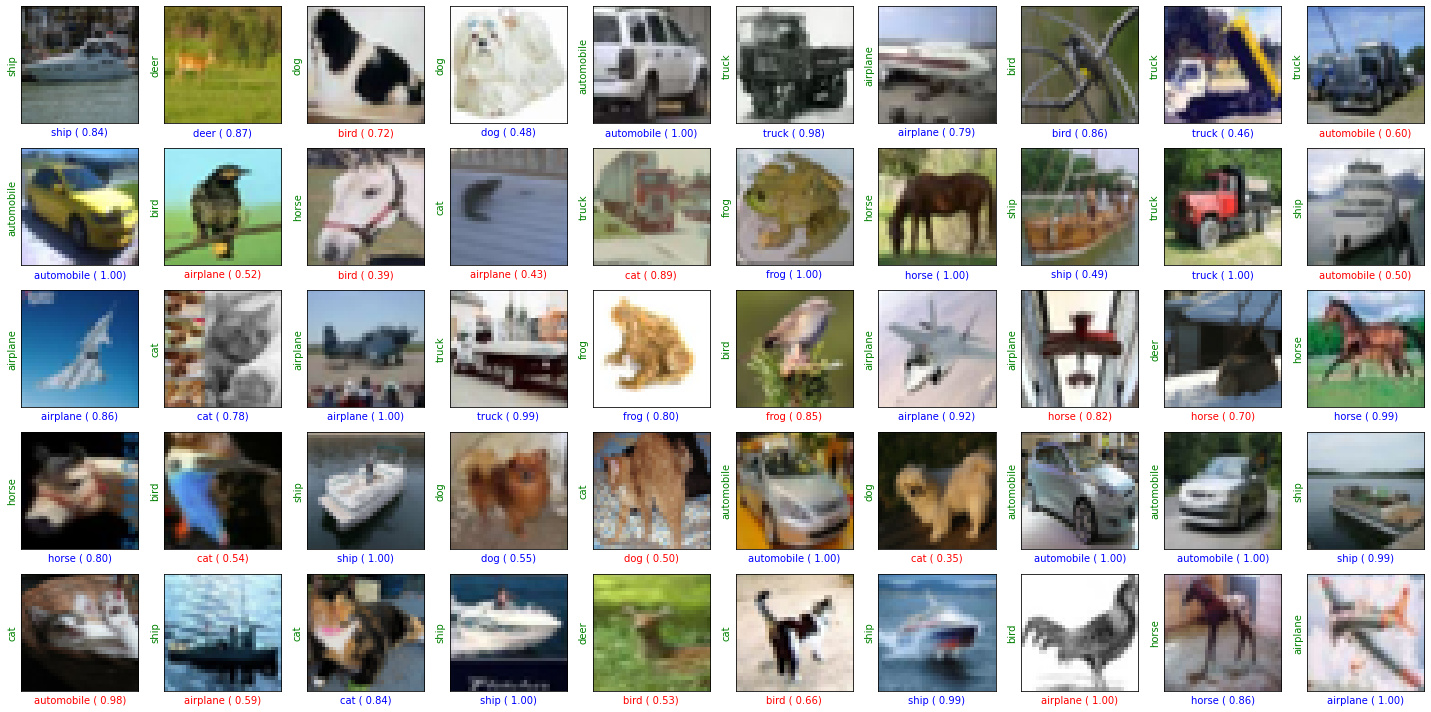

In [38]:
ROWS = 5
COLS = 10

random_indices = random.sample(range(x_test.shape[0]), ROWS*COLS)
sample_images = x_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,10))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(32,32,3))
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{img_name[prediction]} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{img_name[prediction]} ({confidence: .2f})", color='r')
        plt.ylabel(img_name[sample_labels[i][0]], color='g')
        i += 1
        
plt.tight_layout()
plt.show()